In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import keras as K
import tensorflow as tf

# Data Preprocessing


In [3]:
url = "https://raw.githubusercontent.com/emiletimothy24/LC-MS-data/main/modif1.csv"
data = pd.read_csv(url)
values = []
for i in range(len(data['InChIKey'])):
  inchikey = data['InChIKey'][i]
  concentration = data['Concentrations (ug/mL)'][i]
  height = data['Height'][i]
  area = data['Area'][i]
  rt = data['RT'][i]
  actual_rt = data['Actual RT'][i]
  rt_delta = data['RT Delta'][i]
  m_z_expected = data['m/z (Expected)'][i]
  m_z_apex = data['m/z (Apex)'][i]
  m_z_delta = float(data['m/z (Delta) (ppm)'][i])
  integration = data['Integration Mode (Manual 0, Method 1)'][i]
  pk = data['PK (Fail 0, Pass 1)'][i]
  confirm = data['Confirm (confirm 1, Not Found 0)'][i]
  lst = [inchikey, concentration, height, area, rt, actual_rt, rt_delta, m_z_expected, m_z_apex, m_z_delta, integration, pk, confirm]
  values.append(lst)
values = np.asarray(values)

In [4]:
Y = values[:,0]
X = values[:,1:13]

# Visualization of every feature

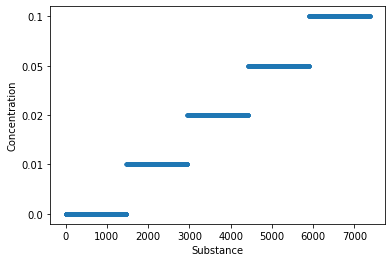

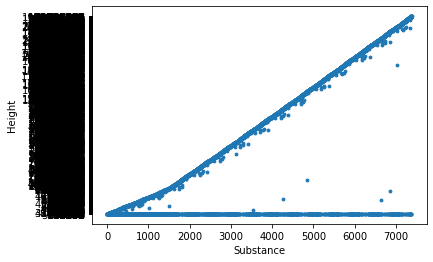

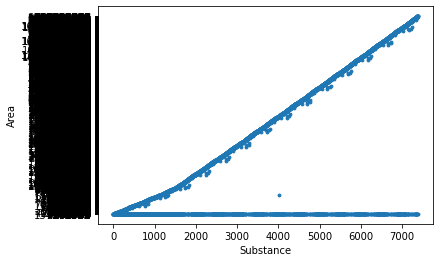

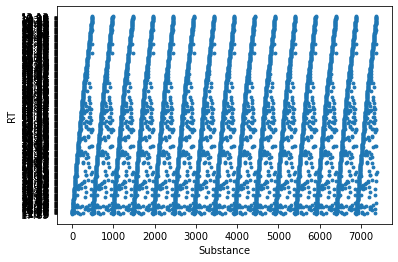

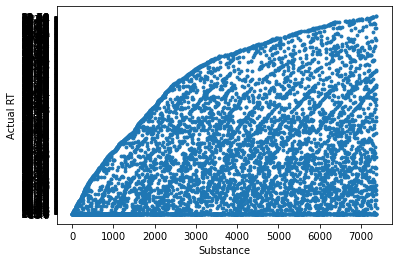

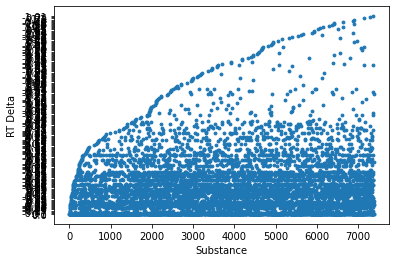

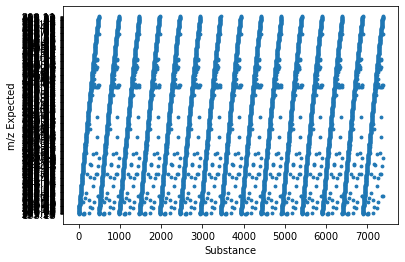

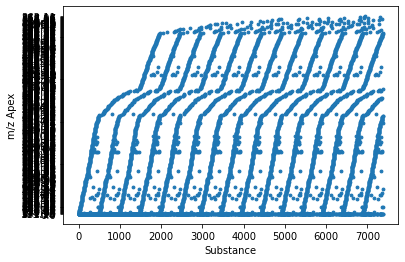

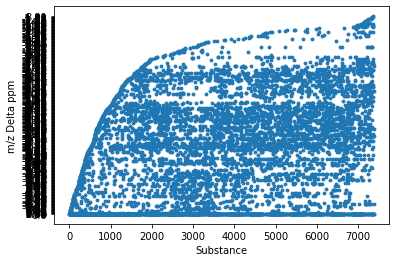

In [5]:
def feature_plotter(i, xlabel, ylabel):
  plt.figure()
  plt.scatter([i for i in range(len(X[:,0]))], X[:,i], s=8, cmap='inferno')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

# Concentration
feature_plotter(0, "Substance", "Concentration")

# Height
feature_plotter(1, "Substance", "Height")

# Area
feature_plotter(2, "Substance", "Area")

# RT
feature_plotter(3, "Substance", "RT")

# Actual RT
feature_plotter(4, "Substance", "Actual RT")

# RT Delta
feature_plotter(5, "Substance", "RT Delta")

# m/z (expected)
feature_plotter(6, "Substance", "m/z Expected")

# m/z (apex)
feature_plotter(7, "Substance", "m/z Apex")

# m/z delta ppm
feature_plotter(8, "Substance", "m/z Delta ppm")

# Encode Y (target feature) value - InChIKey (one hot encoding)

In [6]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [7]:
label = []
for i in Y:
  label.append(i)
label = list(set(label))

labeled_value = array(label)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labeled_value)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])

In [8]:
def is_equal(lst_a, lst_b):
  if len(lst_a) != len(lst_b):
    return False
  for i in range(len(lst_a)):
    if (lst_a[i] != lst_b[i]):
      return False
  return True

def assert_uniqueness_of(lst):
  for i in range(len(lst)):
    for j in range(len(lst)):
      if (i != j):
        if is_equal(lst[i], lst[j]):
          return False
  return True

assert_uniqueness_of(onehot_encoded)

True

In [9]:
onehot_encoded_to_labels = {}
labels_to_onehot_encoded = {}

for i in range(len(onehot_encoded)):
    s = ""
    for j in range(len(onehot_encoded[i])):
      s += str(int(onehot_encoded[0][i]))

labels_to_onehot_encoded[label[i]] = s
onehot_encoded_to_labels[s] = label[i]